In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.fftpack import fft, ifft, fftshift

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86006/538006266.py:24: RuntimeWarning: divide by zero encountered in divide
  C_T = np.maximum(np.exp(1j * np.log(S0 / K) * u - 0.5 * u**2 * sigma**2 * T) / (u**2 + 1j * u) * characteristic_function(u - 1j, T, r, sigma, S0, K), 0)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86006/538006266.py:24: RuntimeWarning: invalid value encountered in divide
  C_T = np.maximum(np.exp(1j * np.log(S0 / K) * u - 0.5 * u**2 * sigma**2 * T) / (u**2 + 1j * u) * characteristic_function(u - 1j, T, r, sigma, S0, K), 0)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86006/538006266.py:24: RuntimeWarning: invalid value encountered in multiply
  C_T = np.maximum(np.exp(1j * np.log(S0 / K) * u - 0.5 * u**2 * sigma**2 * T) / (u**2 + 1j * u) * characteristic_function(u - 1j, T, r, sigma, S0, K), 0)


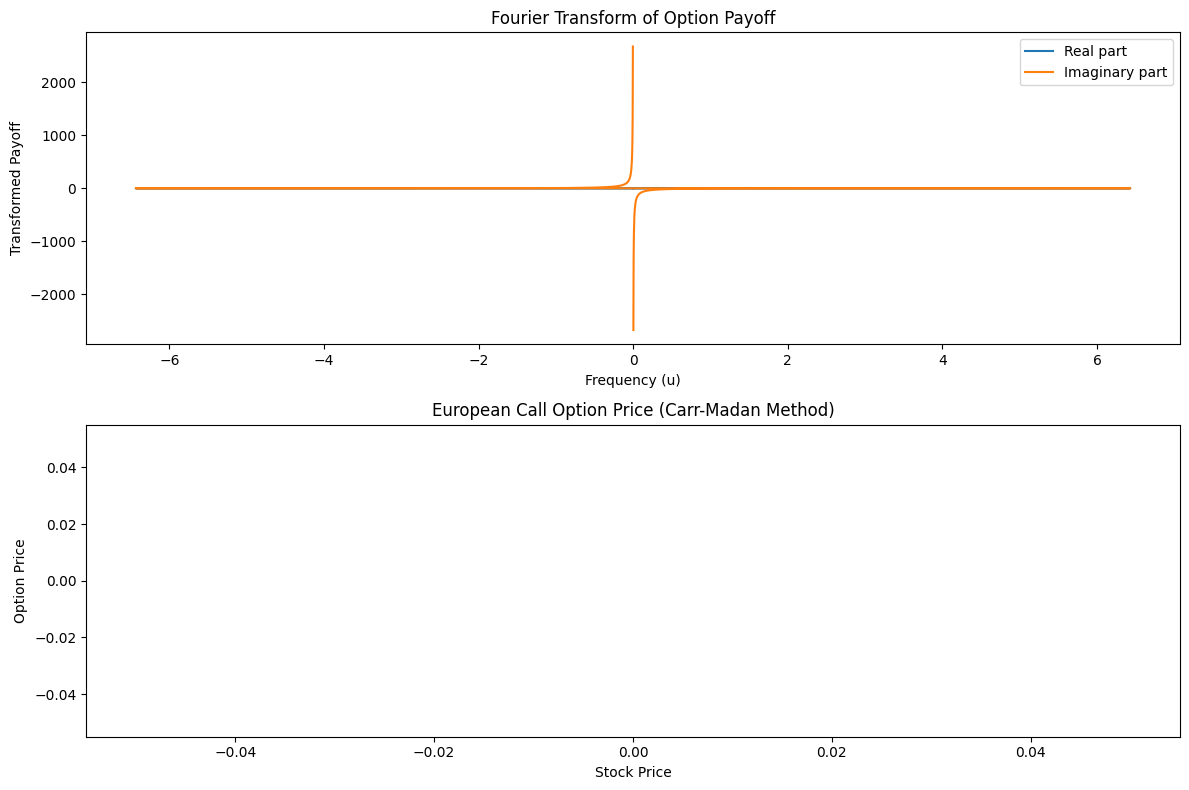

In [3]:
# Option parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
T = 1.0   # Time to maturity
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Fourier transform parameters
N = 4096  # Number of grid points
L = 2000  # Upper truncation limit
dx = L / N  # Grid spacing
x = np.arange(0, N) * dx - L / 2  # Grid in x space

# Define the characteristic function of the log-stock price
def characteristic_function(u, T, r, sigma, S0, K):
    iu = 1j * u
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    phi = np.exp(1j * u * (np.log(S0 / K) + (r - 0.5 * sigma**2) * T) - 0.5 * u**2 * sigma**2 * T)
    return np.exp(-r * T) * S0 * (norm.cdf(d1) - np.exp(iu * np.log(S0 / K)) * norm.cdf(d2)) / iu + phi

# Calculate the Fourier transform of the option payoff
u = 2 * np.pi * np.fft.fftfreq(N, dx)  # Frequency domain
C_T = np.maximum(np.exp(1j * np.log(S0 / K) * u - 0.5 * u**2 * sigma**2 * T) / (u**2 + 1j * u) * characteristic_function(u - 1j, T, r, sigma, S0, K), 0)

# Apply the inverse Fourier transform
call_price = np.real(np.exp(-r * T) * fftshift(ifft(fftshift(C_T)))) * dx

# Plot the Fourier transform and the option value
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(u, np.real(C_T), label='Real part')
plt.plot(u, np.imag(C_T), label='Imaginary part')
plt.title('Fourier Transform of Option Payoff')
plt.xlabel('Frequency (u)')
plt.ylabel('Transformed Payoff')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, call_price)
plt.title('European Call Option Price (Carr-Madan Method)')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')

plt.tight_layout()
plt.show()